In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns

# VGG19 Model

In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

In [4]:
def create_fine_tuned_model(num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

In [5]:
data_dir = '/content/drive/MyDrive/Dataset/Indian Dress Dataset'

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=4
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=4
)


Found 99 images belonging to 7 classes.
Found 21 images belonging to 7 classes.


In [12]:
num_classes = len(train_generator.class_indices)
model = create_fine_tuned_model(num_classes)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 104s 29s/step - accuracy: 0.1300 - loss: 4.7590 - val_accuracy: 0.3333 - val_loss: 7.4897
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 52s 26s/step - accuracy: 0.2812 - loss: 7.0969

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - accuracy: 0.2812 - loss: 7.0969 - val_accuracy: 0.3810 - val_loss: 8.2272
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 128s 23s/step - accuracy: 0.2753 - loss: 8.4995 - val_accuracy: 0.3810 - val_loss: 4.7246
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.3438 - loss: 4.3183 - val_accuracy: 0.3810 - val_loss: 3.1607
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 99s 23s/step - accuracy: 0.5446 - loss: 1.8450 - val_accuracy: 0.2857 - val_loss: 3.0692
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.3750 - loss: 2.7988 - val_accuracy: 0.2857 - val_loss: 2.8943
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 23s/step - accuracy: 0.6193 - loss: 1.6784 - val_accuracy: 0.4286 - val_loss: 2.0251
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.7500 - loss: 0.7681 - val_accuracy: 0.3333 - val_loss: 2.2105
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 22s/step - accuracy: 0.6941 - loss: 0.6999 - val_accuracy: 0.4762 - val_loss: 2.3640
Epoch 10/50


In [13]:
fine_tuned_model = model
class_indices = train_generator.class_indices

In [14]:
fine_tuned_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,621,847 (82.48 MB)

 Trainable params: 532,487 (2.03 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 1,064,976 (4.06 MB)

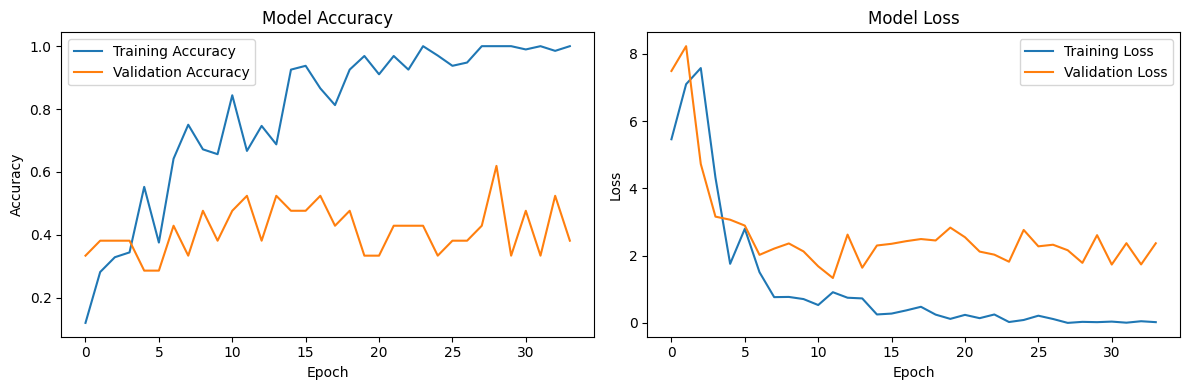

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = fine_tuned_model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.3810 - loss: 2.1402
Validation Loss: 2.1402
Validation Accuracy: 0.3810


In [17]:
# Get predictions on the validation set
validation_generator.reset()
y_pred = fine_tuned_model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


In [18]:
# Generate classification report
class_names = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Anarkali       0.00      0.00      0.00         2
    Churidar       0.33      0.50      0.40         2
       Dhoti       0.25      0.25      0.25         4
     Lehenga       0.00      0.00      0.00         3
Nehru_Jacket       0.00      0.00      0.00         3
       Saree       0.00      0.00      0.00         3
    Sherwani       0.00      0.00      0.00         4

    accuracy                           0.10        21
   macro avg       0.08      0.11      0.09        21
weighted avg       0.08      0.10      0.09        21



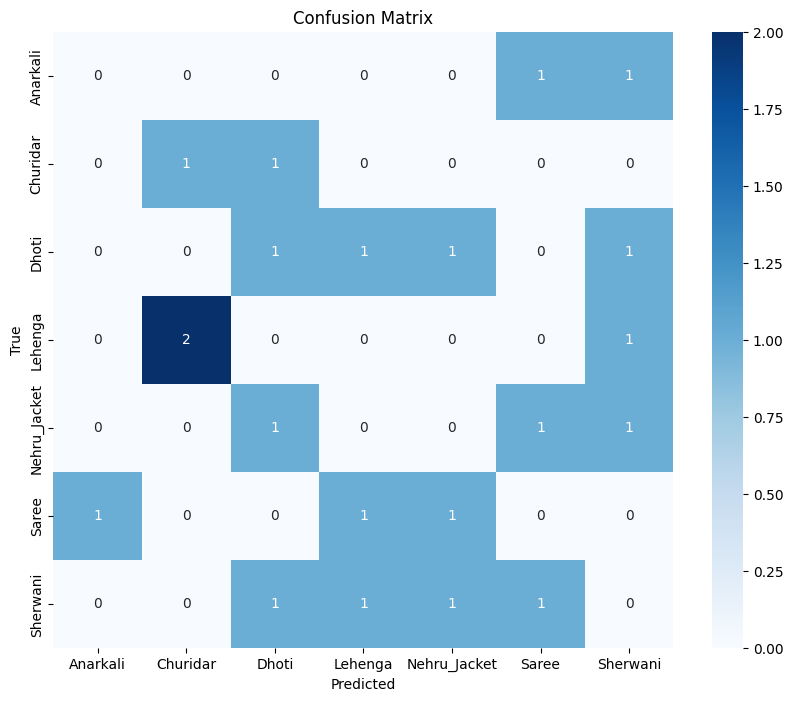

In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
classes = list(train_generator.class_indices.keys())

def predict_dress_style(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    predicts = fine_tuned_model.predict(img_array)

    top_3_indices = np.argsort(predicts[0])[::-1][:3]
    top_3_classes = [classes[i] for i in top_3_indices]
    top_3_probs = [predicts[0][i] for i in top_3_indices]

    return list(zip(top_3_classes, top_3_probs))

In [32]:
input_image_path = "/content/drive/MyDrive/Dataset/Indian Dress Dataset/Sherwani/12download.jpeg"
predict_dress_style(input_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[('Sherwani', 0.24918436), ('Lehenga', 0.1628892), ('Churidar', 0.16148031)]

In [33]:
# Save the models
fine_tuned_model.save('dress_style_vgg_model.h5')

print("Models saved successfully.")

Models saved successfully.
